This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [2]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [3]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('Reboundtruefalse30.csv', skiprows=6, low_memory=False)
Basecasenormal = pd.read_csv('Reboundtruefalse30.csv', skiprows=6, low_memory=False)

In [4]:
# Rename two column names
Basecase.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)

In [5]:
#Basecase["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)
#Basecasenormal["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)

In [6]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)

Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-15
Basecase[0:100]

,run_number,Possession-wears-average,Social-influence,Disposal-feedback?,Number-consumers,Lifetime-decrease-reuse,Social-influence-radius,Scenario?,Random-seed?,Model-scale,...,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,year1,year
36811,7,76,0.5,True,50,30,10,True,False,0.1,...,3.323054,36.025453,18.049831,1.074730,7.472960,216.0,15.2,188.2,15.000000,0.000000
36821,7,76,0.5,True,50,30,10,True,False,0.1,...,3.325564,36.018858,18.063364,1.074803,7.480315,215.8,15.2,188.0,15.002740,0.002740
36827,7,76,0.5,True,50,30,10,True,False,0.1,...,3.319239,36.025627,18.040274,1.074877,7.487685,215.6,15.2,187.8,15.005479,0.005479
36839,7,76,0.5,True,50,30,10,True,False,0.1,...,3.321979,36.019034,18.055052,1.074877,7.487685,215.6,15.2,187.8,15.008219,0.008219
36847,7,76,0.5,True,50,30,10,True,False,0.1,...,3.324719,36.012443,18.069831,1.074877,7.487685,215.6,15.2,187.8,15.010959,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37497,7,76,0.5,True,50,30,10,True,False,0.1,...,3.323401,36.072907,18.162307,1.075342,7.534247,216.8,15.4,189.0,15.260274,0.260274
37503,7,76,0.5,True,50,30,10,True,False,0.1,...,3.324305,36.066415,18.172456,1.075416,7.541626,216.6,15.4,188.8,15.263014,0.263014
37512,7,76,0.5,True,50,30,10,True,False,0.1,...,3.324395,36.059924,18.189488,1.075490,7.549020,216.4,15.4,188.6,15.265753,0.265753
37517,7,76,0.5,True,50,30,10,True,False,0.1,...,3.322317,36.053436,18.172108,1.075564,7.556428,216.2,15.4,188.4,15.268493,0.268493


In [7]:
Basecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758000 entries, 36811 to 2195999
Data columns (total 39 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   run_number                         int64  
 1   Possession-wears-average           int64  
 2   Social-influence                   float64
 3   Disposal-feedback?                 bool   
 4   Number-consumers                   int64  
 5   Lifetime-decrease-reuse            int64  
 6   Social-influence-radius            int64  
 7   Scenario?                          bool   
 8   Random-seed?                       bool   
 9   Model-scale                        float64
 10  Possession-span-average            float64
 11  Value-of-convenience-modification  int64  
 12  Segment-influence                  int64  
 13  Retailer-supply?                   bool   
 14  Environmental-influence            int64  
 15  Reused textiles consumed [%]       object 
 16  Initial-replac

In [8]:
Basecase['Reused textiles consumed [%]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 36811            Current
36821            Current
36827            Current
36839            Current
36847            Current
               ...      
2195995    Current + 30%
2195996    Current + 30%
2195997    Current + 30%
2195998    Current + 30%
2195999    Current + 30%
Name: Reused textiles consumed [%], Length: 1758000, dtype: object>

In [12]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

In [13]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

# Short database

In [26]:
Basecasenormal_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
2194465    71.0
2194830    72.0
2195195    73.0
2195560    74.0
2195925    75.0
Name: year, Length: 6080, dtype: float64>

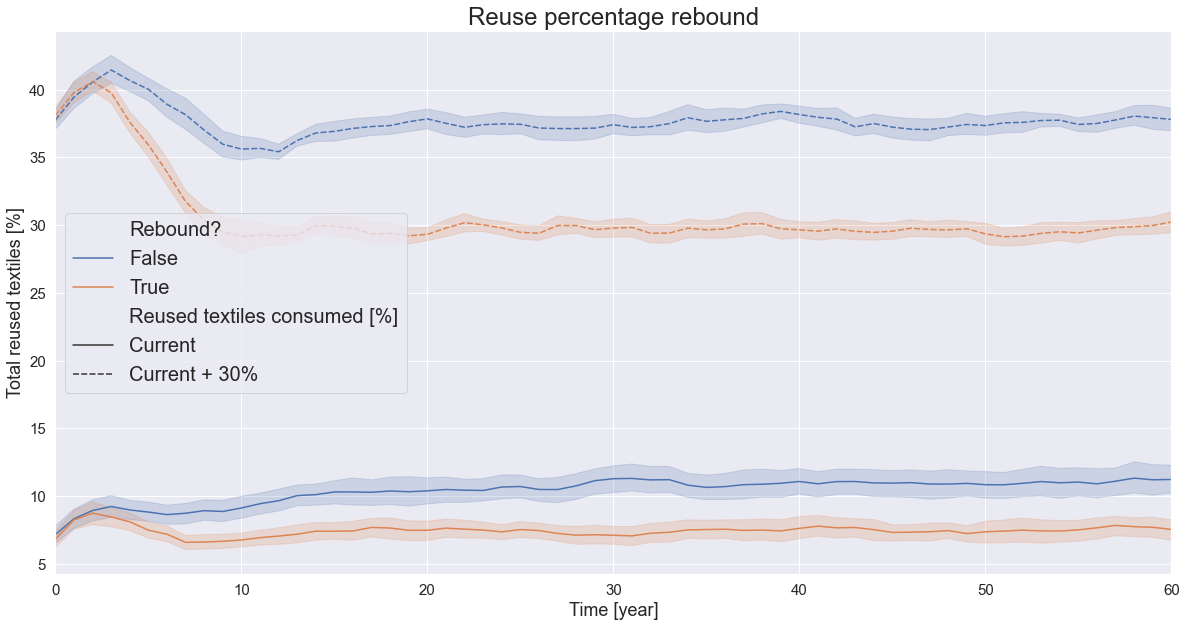

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'reused-textiles-percentage', style = 'Reused textiles consumed [%]',hue = 'Rebound?', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Total reused textiles [%]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 60)
plt.title("Reuse percentage rebound", fontsize = 24)
plt.legend(fontsize=20)
plt.savefig("Lineplot_rebound_reuse_percentage.png")

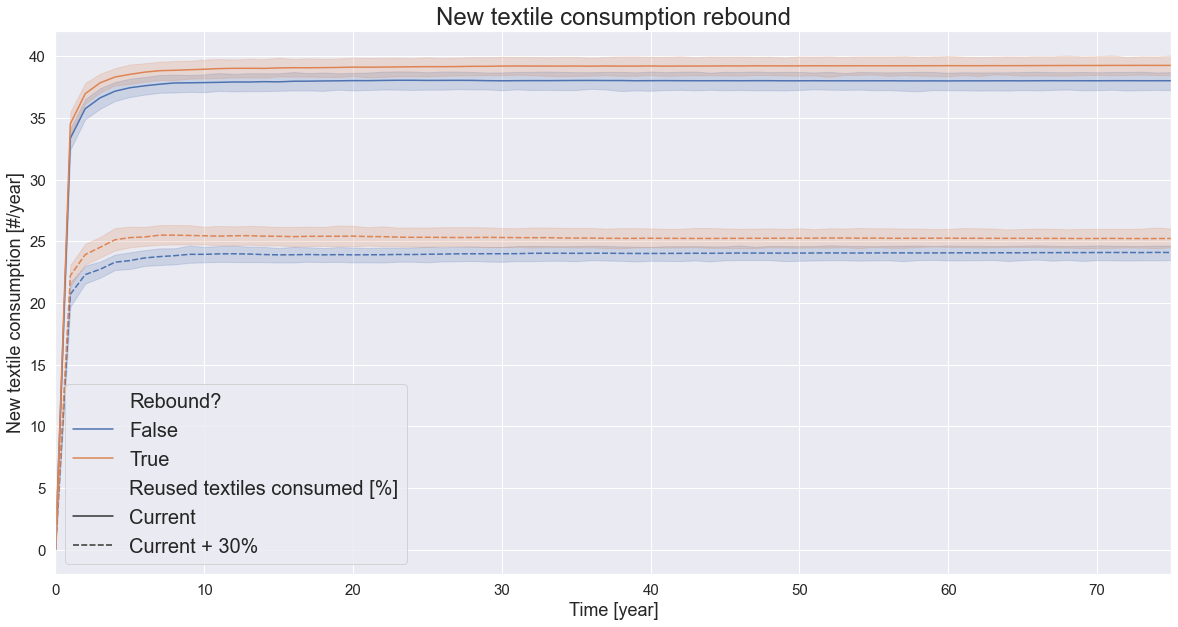

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'new-consumption', hue = 'Rebound?', style = 'Reused textiles consumed [%]',legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title("New textile consumption rebound", fontsize = 24)
plt.legend(fontsize=20)

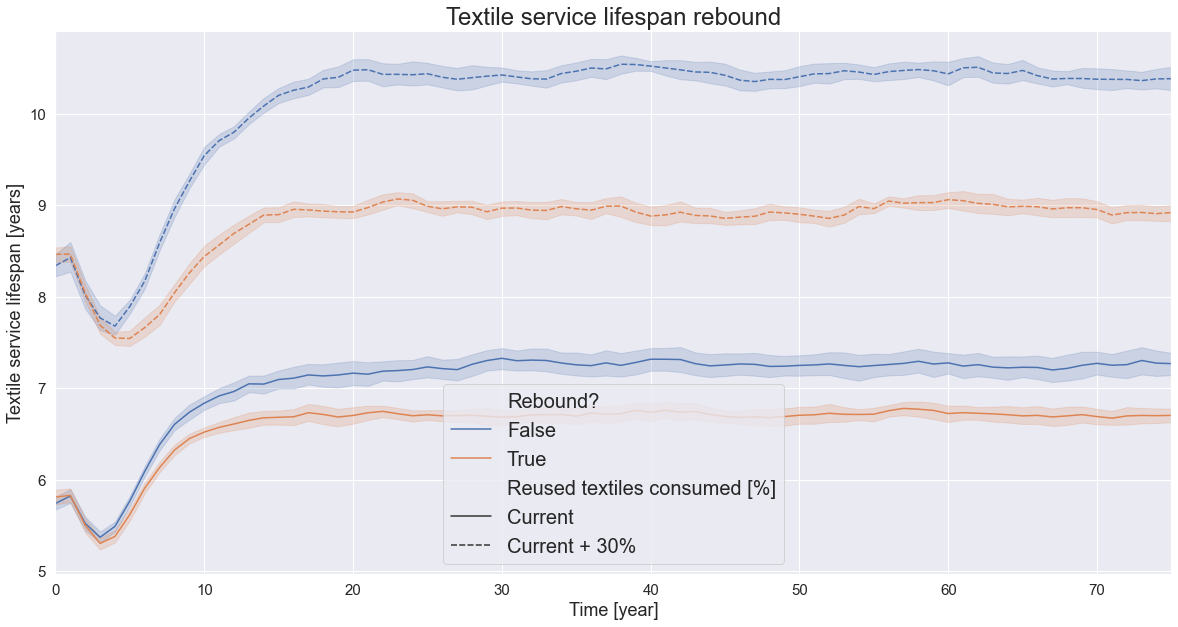

In [29]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'service-lifespan-1', hue = 'Rebound?', style = 'Reused textiles consumed [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Textile service lifespan [years]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title("Textile service lifespan rebound", fontsize = 24)
plt.legend(fontsize=20)

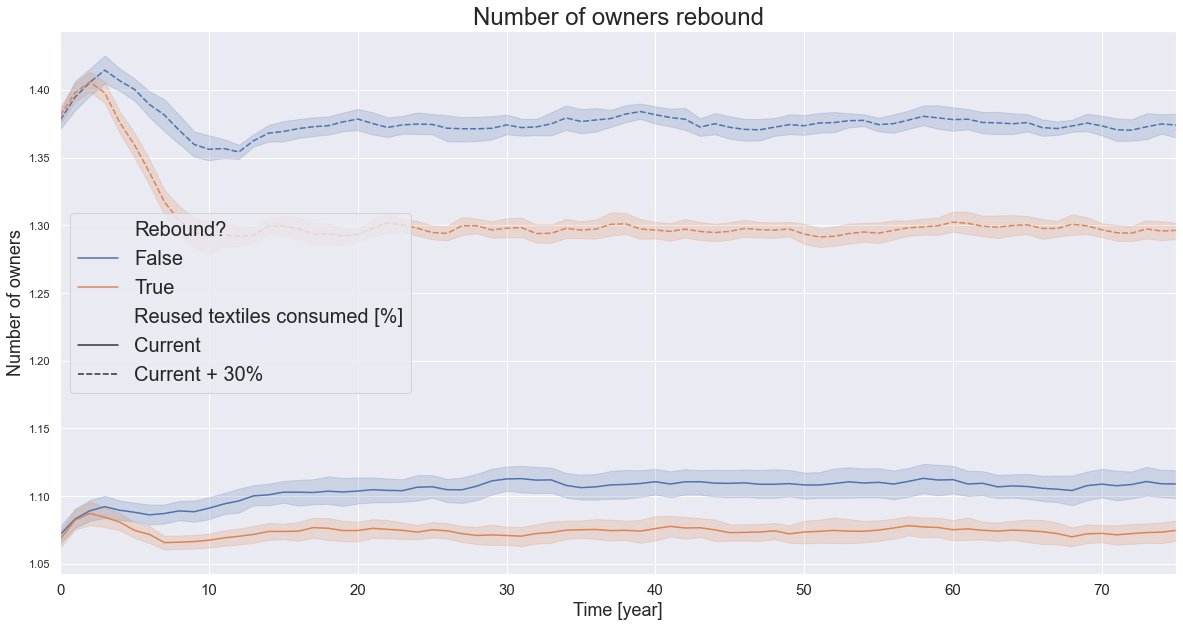

In [13]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'owners', hue = 'Rebound?', style = 'Reused textiles consumed [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of owners", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 75)
#plt.ylim(1.06,1.12)
plt.title("Number of owners rebound", fontsize = 24)
plt.legend(fontsize=20)

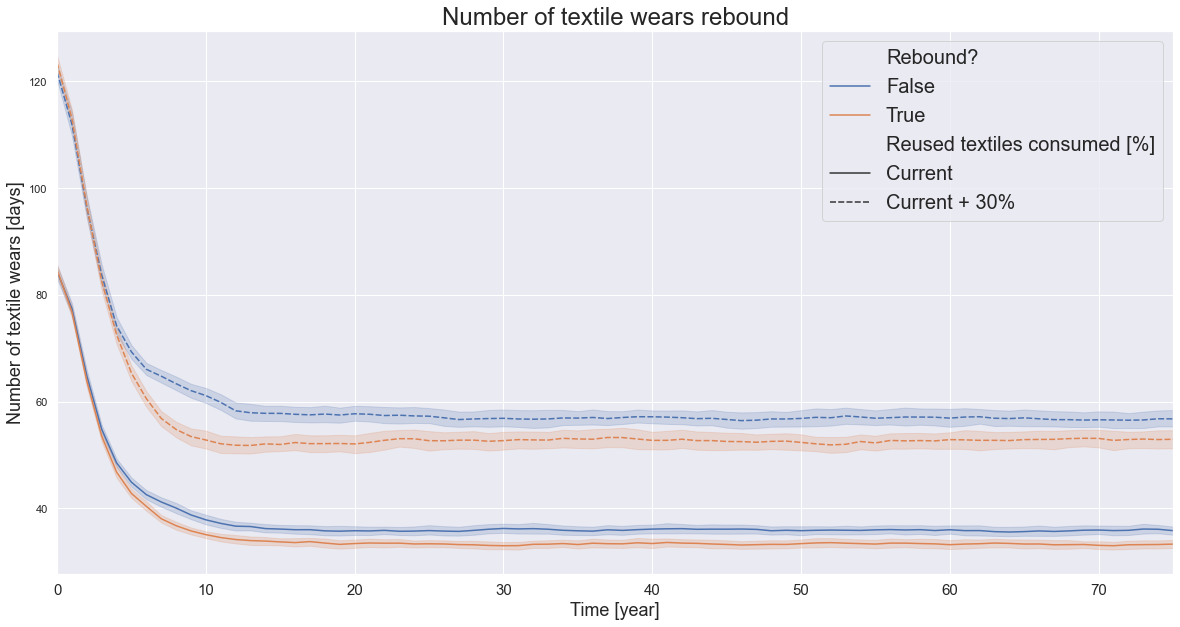

In [33]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'wears-1', hue = 'Rebound?', style = 'Reused textiles consumed [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of textile wears [days]", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 75)
#plt.ylim(1.06,1.12)
plt.title("Number of textile wears rebound", fontsize = 24)
plt.legend(fontsize=20)

# Figures not shortend

[None, None]

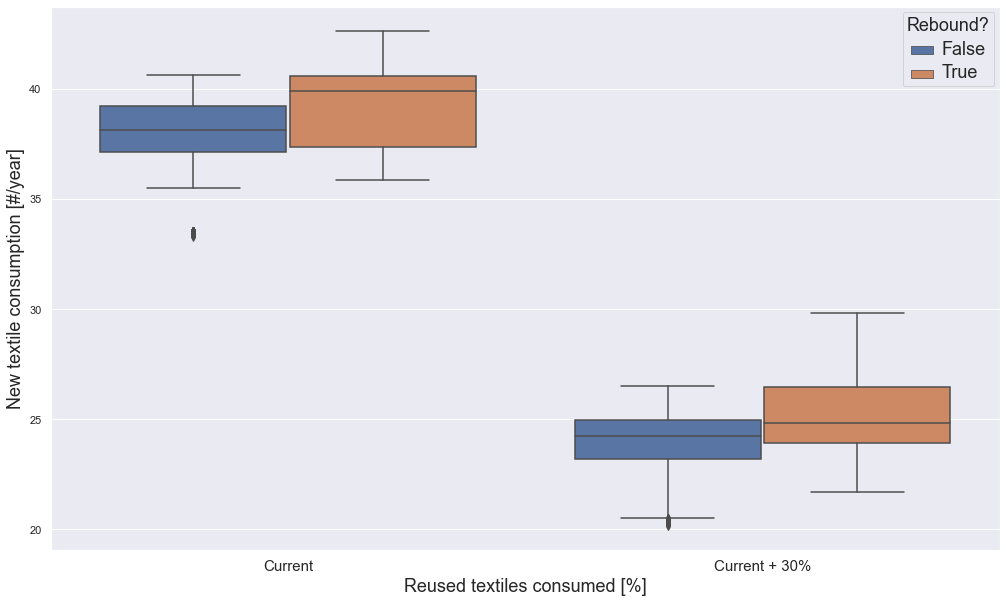

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='new-consumption', hue = 'Rebound?', x= "Reused textiles consumed [%]")
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bn.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bn.legend_.texts[n].set_text(i)
#    n += 1

plt.setp(bn.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bn.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()

[None, None]

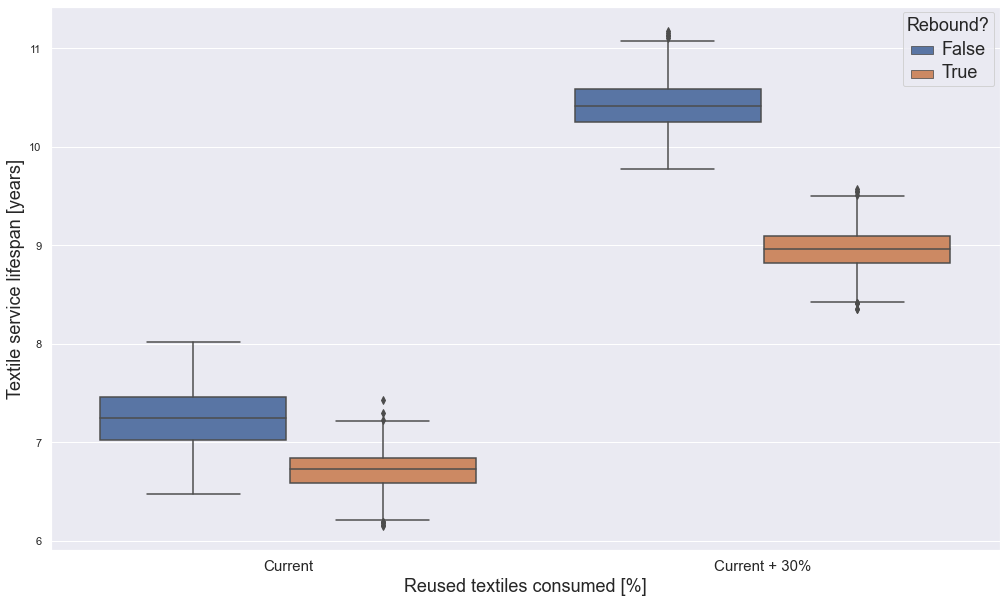

In [31]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bl = sns.boxplot(data=Basecase_short, y ='service-lifespan-1', hue = 'Rebound?', x= "Reused textiles consumed [%]")
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Textile service lifespan [years]', fontsize=18)
plt.xticks(fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bl.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bl.legend_.texts[n].set_text(i)
#    n += 1

plt.setp(bl.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bl.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()

[None, None]

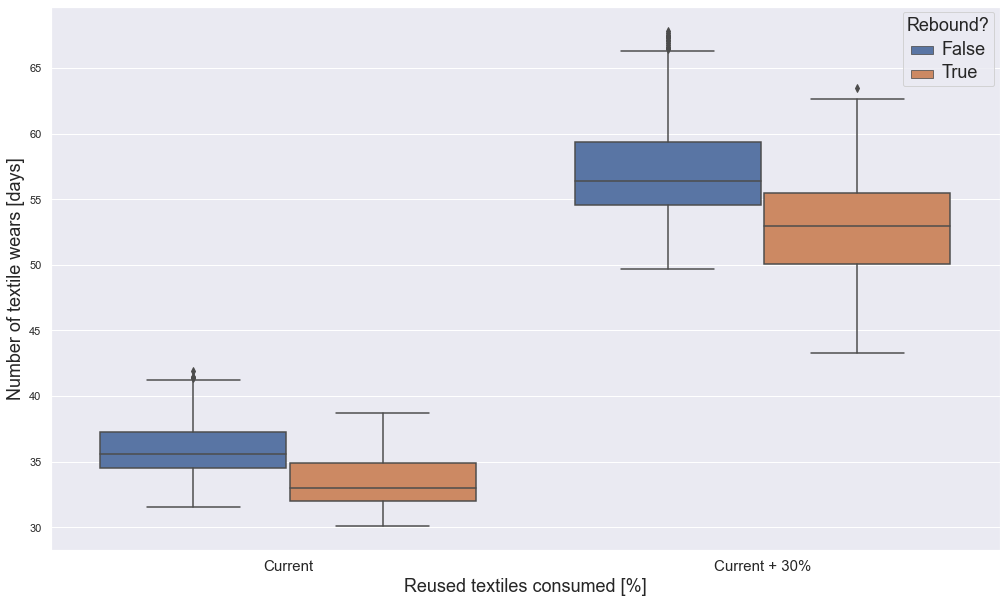

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bw = sns.boxplot(data=Basecase_short, y ='wears-1', hue = 'Rebound?', x= "Reused textiles consumed [%]")
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Number of textile wears [days]', fontsize=18)
plt.xticks(fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bw.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bw.legend_.texts[n].set_text(i)
#    n += 1

plt.setp(bw.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bw.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()

[None, None]

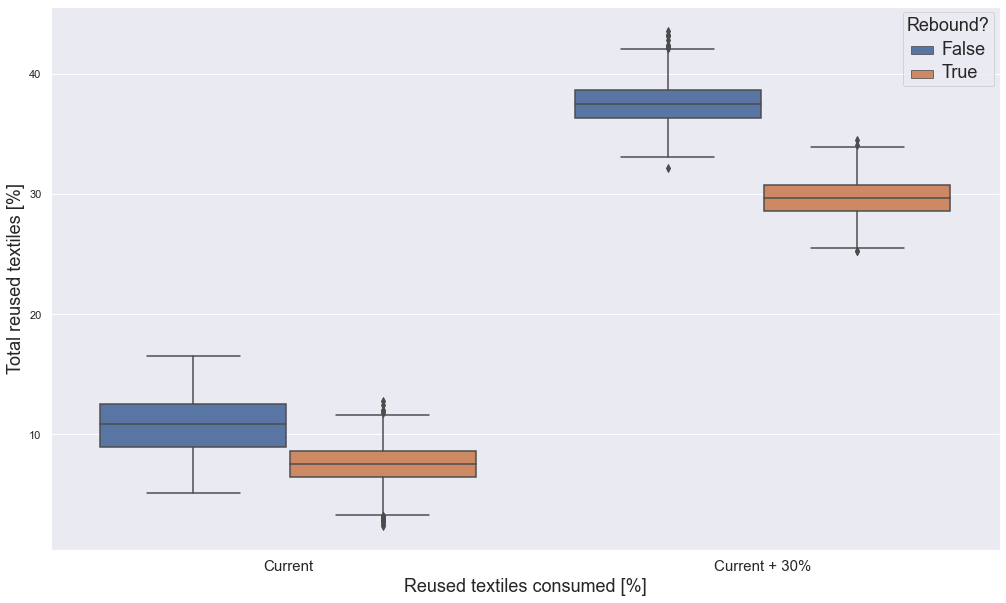

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bp = sns.boxplot(data=Basecase_short, y ='reused-textiles-percentage', hue = 'Rebound?', x= "Reused textiles consumed [%]")
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Total reused textiles [%]', fontsize=18)
plt.xticks(fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bp.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bp.legend_.texts[n].set_text(i)
#    n += 1

plt.setp(bp.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bp.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()

[None, None]

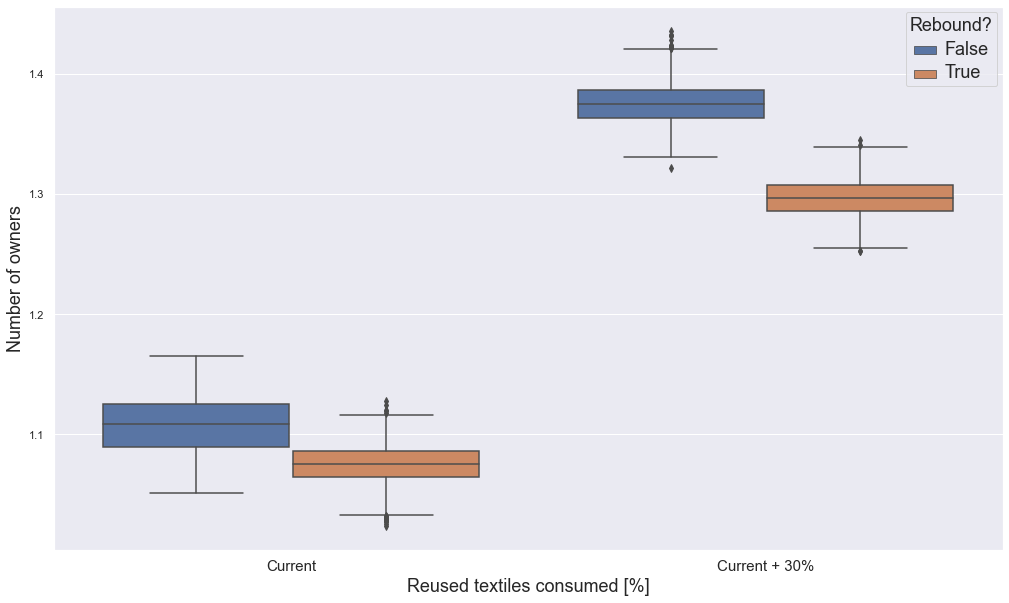

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bo = sns.boxplot(data=Basecase_short, y ='owners', hue = 'Rebound?', x= "Reused textiles consumed [%]")
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Number of owners', fontsize=18)
plt.xticks(fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bo.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bo.legend_.texts[n].set_text(i)
 #   n += 1

plt.setp(bo.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(bo.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()